# Beer Wizard
### Programma che classifica per stile una birra in base alle caratteristiche fornite
\
Progetto d'esame di Programmazione di Applicazioni Data Intensive \
a.a. 2023/2024 \
DISI - Università di Bologna, Cesena \
**Realizzato da:**
* Martino Pagliarani 0001028890 martino.pagliarani@studio.unibo.it


## Inizializzazione dell'ambiente
Il primo passo è quello di analizzare i dati, per farlo è necessario importare le seguenti librerie:
* *numpy* &rarr; utilizzato per l'analisi numerica dei dati sotto forma di array
* *pandas* &rarr; utilizzato per l'analisi numerica dei dati sotto forma di tabelle
* *pyplot* &rarr; utilizzato per la visualizzazione dei dati sotto forma di grafici
* *os.path* &rarr; utilizzato per la gestione dei file

In [183]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path

## Caricamento dei dati
Carichiamo i dati da [Kaggle](https://www.kaggle.com/datasets/stephenpolozoff/top-beer-information?select=beer_data_set.csv "Title"). \
Al momento della scrittura, l'ultimo update del dataset risale al 2021 e contiene 5317 birre e le tutte le informazioni relative ad esse. Il dataset è stato ricavato dal sito: [BeerAdvocate](https://www.beeradvocate.com). \
Ogni birra contiene i seguenti dati:
* `Name` &rarr; nome della birra
* `key` &rarr; chiave univoca della birra
* `Style` &rarr; stile della birra
* `Style_key` &rarr; chiave univoca dello stile della birra
* `Brewery` &rarr; birrificio che produce la birra
* `Description` &rarr; descrizione della birra
* `ABV` &rarr; "Alcohol By Volume" gradazione alcolica della birra
* `Avg Rating` &rarr; valutazione media della birra
* `Min IBU` &rarr; valore minimo dell'indice di amarezza
* `Max IBU` &rarr; valore massimo dell'indice di amarezza
* `Astringency` &rarr; astringenza della birra
* `Body` &rarr; corpo della birra
* `Alcohol` &rarr; quanto si sente l'alcol nella birra
* `Bitter` &rarr; amarezza della birra
* `Sweet` &rarr; dolcezza della birra
* `Sour` &rarr; acidità della birra
* `Salty` &rarr; quanto è salata la birra
* `Fruits` &rarr; quanto è fruttata la birra
* `Hoppy` &rarr; quanto è luppolata la birra
* `Spices` &rarr; quanto è speziata la birra
* `Malty` &rarr; quanto è maltata la birra

In [184]:
file = "./beer_data_set.csv"
if not os.path.exists(file):
    print("Missing dataset, download it manually from Kaggle: https://www.kaggle.com/datasets/stephenpolozoff/top-beer-information?select=beer_data_set.csv")

beer = pd.read_csv(file, index_col=1)

Per prima cosa vediamo se ci sono dei valori null e qualora ci siano li eliminiamo.

In [185]:
beer.isnull().sum()

Name           2
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [186]:
beer = beer.dropna()
beer.isnull().sum()

Name           0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [187]:
beer.head()

,Name,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,,,,,
251,Amber,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
252,Double Bag,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
253,Long Trail Ale,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
254,Doppelsticke,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
255,Scurry,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218


Per il nostro specifico caso d'uso, non ci interessano tutti i dati presenti nel dataset, quindi rimuoviamo i dati non necessari.

In [188]:
beer.drop(columns=["Style Key", "Brewery", "Description"], inplace=True)

In [189]:
beer.head(1)

,Name,Style,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,,
251,Amber,Altbier,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111


Inoltre vogliamo creare una nuova variabile chiamata `Avg IBU` che rappresenta la media tra `Min IBU` e `Max IBU` e eliminare le due variabili. Infine riordiniamo le colonne.

In [190]:
beer["Avg IBU"] = beer[["Min IBU", "Max IBU"]].mean(axis=1)
beer = beer[beer["Style"] != "Lambic - Faro"]
beer.drop(columns=["Min IBU", "Max IBU"], inplace=True)
beer = beer.rename(columns={"Ave Rating": "Avg Rating"})
beer = beer[["Name", "Style", "Avg IBU", "Avg Rating", "ABV", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"]]

In [191]:
beer.head()

,Name,Style,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,
251,Amber,Altbier,37.5,3.65,5.3,13,32,9,47,74,33,0,33,57,8,111
252,Double Bag,Altbier,37.5,3.90,7.2,12,57,18,33,55,16,0,24,35,12,84
253,Long Trail Ale,Altbier,37.5,3.58,5.0,14,37,6,42,43,11,0,10,54,4,62
254,Doppelsticke,Altbier,37.5,4.15,8.5,13,55,31,47,101,18,1,49,40,16,119
255,Scurry,Altbier,37.5,3.67,5.3,21,69,10,63,120,14,0,19,36,15,218


## Analisi esplorativa dei dati

Per prima cosa visualizziamo i dati in nostro possesso, in particolare quante birre distinte ci sono e quanti stili di birra sono presenti.

In [192]:
print("Numero di birre: ", beer["Name"].nunique())
print("Numero di stili: ", beer["Style"].nunique())

Numero di birre:  5305
Numero di stili:  111


Visualizziamo il numero di birre per ogni stile presente nel dataset.

In [193]:
beer.value_counts("Style")

Style
Altbier                           50
Pilsner - Imperial                50
Red Ale - Imperial                50
Red Ale - American Amber / Red    50
Quadrupel (Quad)                  50
                                  ..
Sour - Flanders Oud Bruin         49
Sour - Flanders Red Ale           49
Lager - European Pale             49
Sour - Gose                       49
Sour - Berliner Weisse            49
Name: count, Length: 111, dtype: int64

In [194]:
beer.value_counts("Style").mean()

49.909909909909906

Notiamo che sono in media ci sono circa 50 birre per stile di birra. \
Ciò dimostra che il dataset è ben bilanciato.

Attraverso la funzione describe possiamo ottenere informazioni statistiche sulle variabili numeriche del nostro dataset.

In [195]:
beer.describe()

,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000
mean,29.661733,3.760666,6.640401,15.964260,42.831227,16.015523,34.410830,53.611552,34.579061,1.317148,39.416426,38.514621,17.626534,68.739350
std,17.311383,0.443254,2.522439,11.625023,28.582000,18.283117,27.108819,35.783506,39.826670,3.879894,36.669337,31.912935,23.997150,44.581073
min,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.590000,5.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,25.000000,3.820000,6.000000,14.000000,38.000000,10.000000,29.000000,50.000000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,37.500000,4.040000,7.900000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,62.000000,56.000000,22.000000,100.000000
max,82.500000,4.830000,57.500000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


Mostriamo ora la distribuzione delle birre in base alla gradazione alcolica.

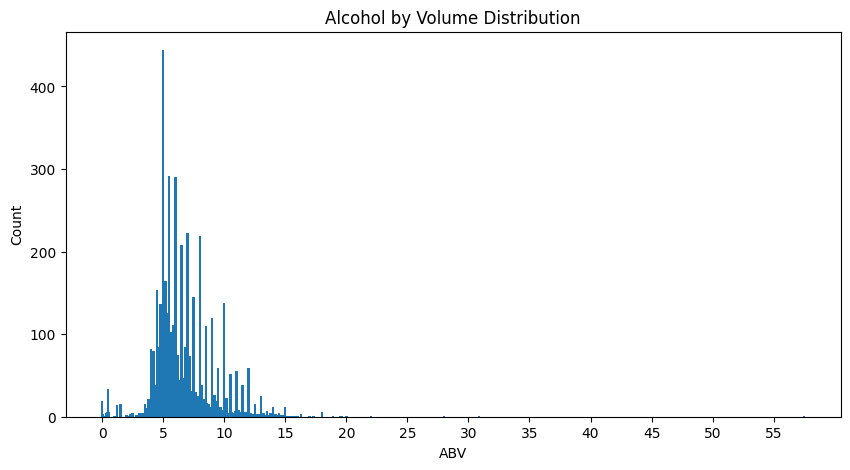

In [196]:
def plot_ABV():
    plt.figure(figsize=(10, 5))
    plt.bar(beer["ABV"].value_counts().index, beer["ABV"].value_counts().values, width=0.2)
    plt.xlabel("ABV")
    plt.xticks(np.arange(0, 60, 5))
    plt.ylabel("Count")
    plt.title("Alcohol by Volume Distribution")
    plt.show()
    
plot_ABV()

Possiamo notare che la maggior parte delle birre ha gradazione alcolica compresa tra 5% e 10%.

Inoltre, possiamo notare un caso limite di una birra con gradazione alcolica pari a 57.5%.

In [197]:
beer[beer["ABV"] == beer["ABV"].max()]

,Name,Style,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,
75,Schorschbock 57%,Bock - Eisbock,30.0,2.97,57.5,0,7,17,3,9,6,0,10,0,2,4


D'ora un poi considereremo solo le birre con gradazione alcolica compresa tra 0% e 20%.

In [198]:
beer = beer[beer["ABV"] < 20]

Proviamo a vedere se esiste una correlazione tra la gradazione alcolica e la valutazione media della birra utilizzando un grafico di dispersione.

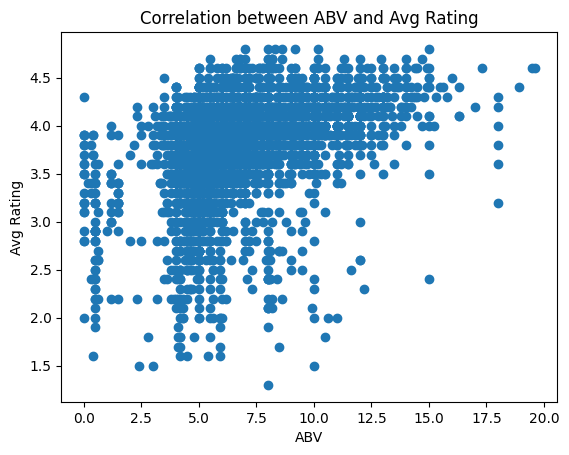

In [199]:
beer = beer.round(1)
plt.scatter(beer["ABV"], beer["Avg Rating"])
plt.xlabel("ABV")
plt.ylabel("Avg Rating")
plt.title("Correlation between ABV and Avg Rating")
plt.show()

Come si può notare, non esiste una correlazione significativa tra la gradazione alcolica e la valutazione media della birra.

Di seguito troviamo una funzione generica che ci permette di visualizzare le caratteristiche in un grafico a barre e in un grafico a torta.

In [200]:
def plot_characteristics(filter_type, filter_value):
    if filter_type not in ["Style", "Name"]:
        print("Invalid filter type. Please choose 'Style' or 'Name'.")
        return
    filtered_data = beer[beer[filter_type] == filter_value]
    filtered_data = filtered_data.drop(columns=["Name", "Style"])
    filtered_data = filtered_data.mean()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    cmap = plt.get_cmap("tab20")
    colors = cmap(np.arange(len(filtered_data)))
    
    filtered_data.plot(kind="bar", title=filter_type + ": " + filter_value, ax=axs[0], color=colors)
    filtered_data.plot(kind="pie", title=filter_type + ": " + filter_value, ax=axs[1], colors=colors)
    
    plt.tight_layout()
    plt.show()

Sfruttiamo la funzione per mostrare le caratteristiche generali di uno specifico stile di birra. \
Notiamo che le birre di stile "Red Ale - Imperial" sono piuttosto luppolate e maltate.

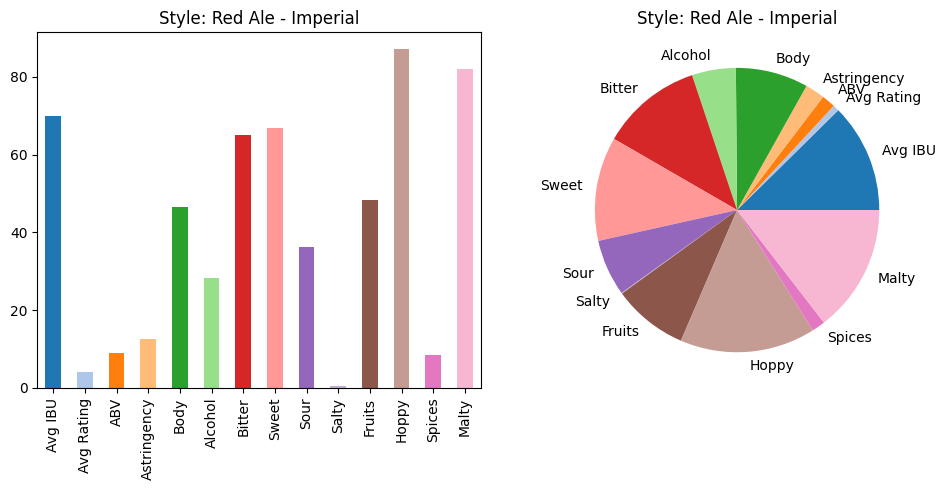

In [201]:
plot_characteristics("Style", "Red Ale - Imperial")

Invece, ora visualizziamo le caratteristiche di una birra specifica. \
Notiamo che la birra "Long Trail Ale" è molto speziata e maltata.

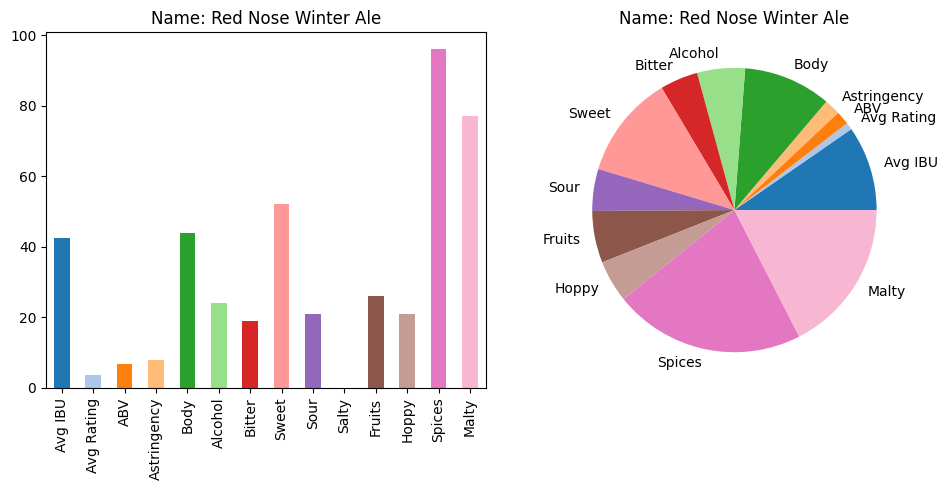

In [202]:
plot_characteristics("Name", "Red Nose Winter Ale")

Proviamo ora a vedere se e quanto sono correlate internamente le caratteristiche delle birre. 

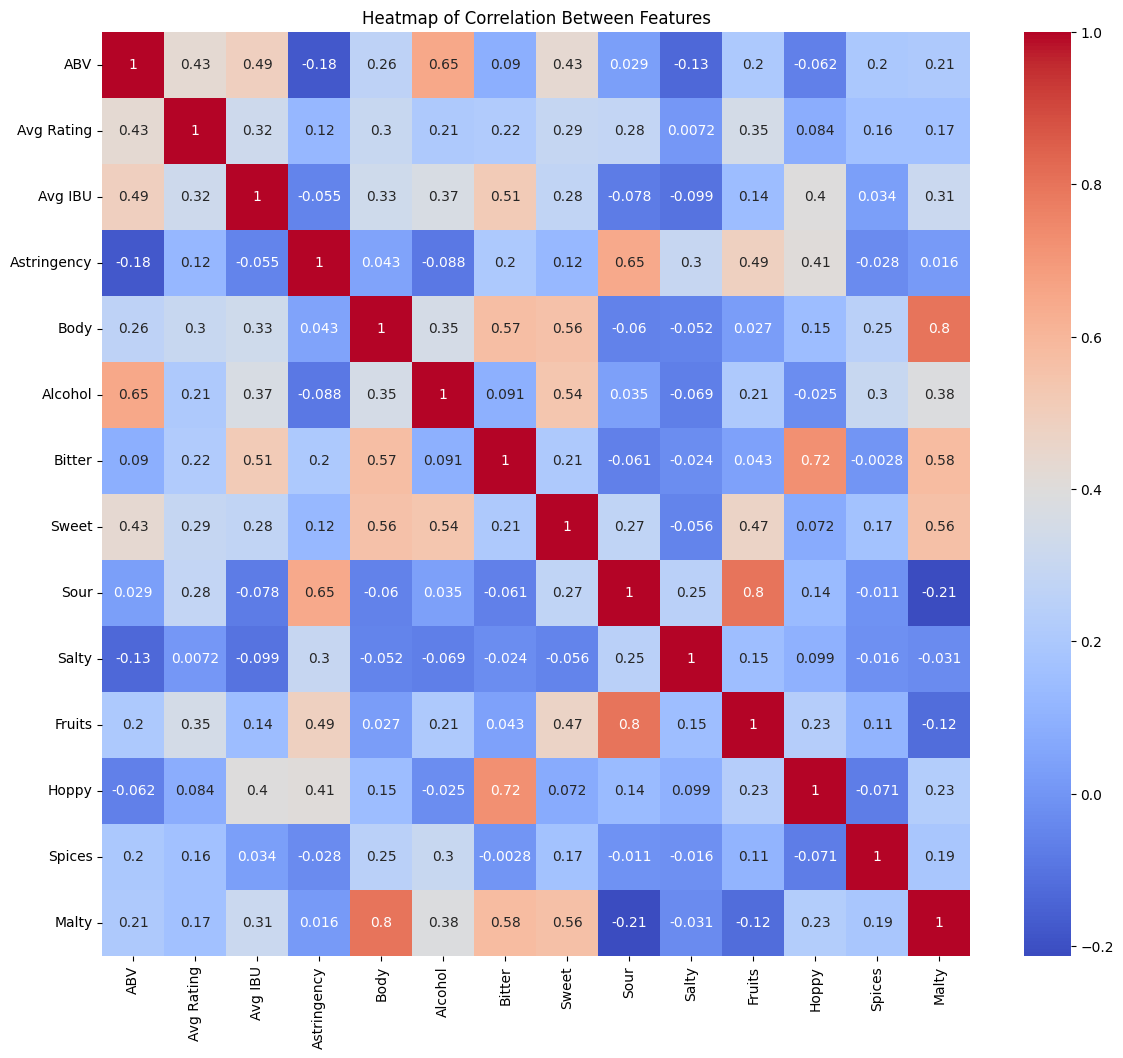

In [203]:
import seaborn as sb

# Calcola la correlazione tra le caratteristiche numeriche
correlation = beer[['ABV', 'Avg Rating', 'Avg IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']].corr()
# Crea un heatmap con seaborn
plt.figure(figsize=(14, 12))
sb.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Features')
plt.show()

Come ci si aspettava, alcune caratteristiche sono correlate tra loro come ad esempio Body e Malty, infatti più è maltata una birra più è corposa.

## Preparazione dei dati

Dopo la fase di analisi espolorativa dei dati, prepariamo i dati per l'addestramento del modello. \
I dati che ci interessano sono le caratteristiche della birra e lo stile della birra. \
In particolare avremo bisogno della variabile target:
* `Style` &rarr; stile della birra

e delle features predittive:
* `ABV` &rarr; gradazione alcolica della birra
* `Avg IBU` &rarr; media tra `Min IBU` e `Max IBU`
* `Astringency` &rarr; astringenza della birra
* `Body` &rarr; corpo della birra
* `Alcohol` &rarr; quanto si sente l'alcol nella birra
* `Bitter` &rarr; amarezza della birra
* `Sweet` &rarr; dolcezza della birra
* `Sour` &rarr; acidità della birra
* `Salty` &rarr; quanto è salata la birra
* `Fruits` &rarr; quanto è fruttata la birra
* `Hoppy` &rarr; quanto è luppolata la birra
* `Spices` &rarr; quanto è speziata la birra
* `Malty` &rarr; quanto è maltata la birra

Sapendo cosa ci interessa creiamo le due nuove variabile che ci serviranno per addestrare il modello:
* `y` &rarr; variabile target, rappresenta lo stile della birra
* `X` &rarr; variabile indipendente, rappresenta l'insieme delle caratteristiche della birra 

In [204]:
y = beer["Style"]
X = beer[[col for col in beer.columns if col != "Style" and col != "Name" and col != "Avg Rating"]]

A questo punto bisogna suddividere i dati in training set e validation set. \
Decidiamo di avere 1/4 dei dati nel validation set e 3/4 dei dati nel training set.

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/4,
    random_state=42
)

Dal momento che le nostre feature non sono binarie e hanno molti valori distinti, non è possibile utilizzare un modello di classificazione binaria. \
Quindi proviamo a utilizzare modelli di classificazioni lineari come il Perceptron. \
Ma prima vogliamo standardizzare i dati per evitare che le feature con valori più grandi abbiano un peso maggiore.

In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd_train = scaler.fit_transform(X_train)
Xstd_val = scaler.transform(X_val)

A questo punto vogliamo creare un Perceptron per spiegare i vari passaggi dei modelli di classificazione

In [207]:
from sklearn.linear_model import Perceptron
model = Perceptron()

Il prossimo passo è addestrare il modello con i dati standardizzati di training.

In [208]:
model.fit(Xstd_train, y_train)

Perceptron()

A questo punto possiamo notare i valori dei pesi `w` con `model.coef` 

In [209]:
model.coef_[0]

array([ 1.88314055, -0.14822227, -0.22266237, -2.86087498, -1.3978315 ,
       -3.2828227 ,  0.23690257, -2.01834476, -5.85734101,  0.9164407 ,
        3.30639815, -1.8838866 ,  3.88005306])

E il valore del bias `b` con `model.intercept_`

In [210]:
model.intercept_[0]

-19.0

In questo caso prendiamo per esempio il primo iperpiano "[0]" ma effettivamente abbiamo 111 iperpiani che equivalgono ai 111 stili di birra. \
Ogni piano è composto da 13 pesi e un bias. \
Questo si nota controllando la shape di `model.coef_`

In [211]:
model.coef_.shape

(111, 13)

Avremo quindi l'equazione per ogni piano `w1*x1 + w2*x2 + ... + w13*x13 + b = 0` 

A questo punto possiamo calcolare la predizione del modello sul validation set.

In [212]:
model.predict(Xstd_val)

array(['Pale Ale - English', 'Sour - Flanders Red Ale',
       'Lager - European Pale', ..., 'Pale Ale - American',
       'Lager - European / Dortmunder Export', 'Bock - Maibock'],
      dtype='<U52')

Ora possiamo testare tramite `model.score` l'accuratezza del modello valutando il modello con i dati di validation standardizzati. \
Prendiamo in considerazione la metrica dell'accuratezza dal momento che i nostri dati sono bilanciati.

In [213]:
print("Accuracy: ", round(model.score(Xstd_val, y_val) * 100, 2))

Accuracy:  17.7


Notiamo che avendo solamente il 17% di accuratezza, il modello non è in grado di classificare correttamente le birre. \
Inoltre, dal momento che contiene più di 2 e 3 dimensioni non è possibile visualizzare il modello. L'unico modo per visualizzarlo sarebbe ridurre le dimensioni a 2 o 3 con tecniche di riduzione della dimensionalità ma, dal momento che le nostre feature sono tutte di egual importanza, non è possibile ridurre le dimensioni.

## Modellazione

Poiché il modello Perceptron non è in grado di classificare con alta accuratezza i diversi tipi delle birre, proviamo ad utilizzare altri modelli di classificazione. \
Questi modelli sono:
* Regressione Logistica
* Support Vector Machine (SVM)
* Decision Tree
* Random Forest
* Bagging Classifier

Per valutare i modelli utilizzeremo la Grid Search con la cross-validation con 5 fold. \
Quindi scrivo una funziona generica che addestra un modello con la Grid Search e la cross-validation.

In [215]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

random_state = 42

models = {}

k_fold = KFold(n_splits=5, shuffle=True, random_state=random_state)

def gridSearchCrossValidation(model, grid, kfold, features, target, scoring=None):
    grid_search = GridSearchCV(model, grid, scoring=scoring, cv=kfold, n_jobs=-1)
    # Splitting dei dati in training e validation set (75% - 25% split)
    X_train, X_val, y_train, y_val = train_test_split(
        features, target,
        test_size=1/4,
        random_state=random_state
    )
    grid_search.fit(X_train, y_train)
    
    # Arrotondiamo i dati per una migliore leggibilità
    val_score = round(grid_search.score(X_val, y_val) * 100, 2)
    train_score = round(grid_search.score(X_train, y_train) * 100, 2)
    
    y_pred = grid_search.predict(X_val)
    # Average impostato a "macro" perché i nostri dati sono bilanciati e vogliamo ottenere la media delle metriche per ogni classe
    precision_score_val = round(precision_score(y_val, y_pred, average="macro") * 100, 2)
    recall_score_val = round(recall_score(y_val, y_pred, average="macro") * 100, 2)
    f1_score_val = round(f1_score(y_val, y_pred, average="macro") * 100, 2)
    scores = {
        "Accuracy on validation set": val_score,
        "Accuracy on training set": train_score,
        "Precision Score": precision_score_val,
        "Recall Score": recall_score_val,
        "F1 Score": f1_score_val,
    }
    
    return grid_search.best_params_, grid_search.best_score_, grid_search.best_estimator_, scores

Riguardo ai parametri di regolarizzazione dei modelli, mi limiterò a utilizzare il valori di default dove, provando a fare fine tuning, non ho ottenuto risultati migliori. \
Modificando a mano i parametri si può ottenere un modello che si adatta meglio ai dati di addestramento e di validazione. \
Ciò divide la scelta dei parametri dei modelli in due:
* Caso in cui il modello si adatterà troppo ai dati di addestramento, si avrà `overfitting`.
* Caso in cui il modello sarà meno sensibile agli errori di classificazione non adattandosi bene ai dati di addestramento, in questo caso si avrà `underfitting`.

### Perceptron
Notiamo che l'accuratezza è abbastanza bassa ma, avendo applicato Grid Search e Cross-Validation, il modello è leggermente più accurato rispetto a prima. \
Modifico gli iperparametri:
* `penalty` &rarr; norma utilizzata per la regolarizzazione
* `alpha` &rarr; parametro di regolarizzazione
* `fit_intercept` &rarr; se aggiungere un termine di intercetta al modello

In [87]:
perceptron_model = Pipeline([
    ("scaler", StandardScaler()),
    ("perceptron", Perceptron(n_jobs=-1, random_state=random_state))
])

perceptron_grid = {
    "scaler": [StandardScaler(), None],
    "perceptron__penalty": ["l2", "l1", "elasticnet"],
    "perceptron__alpha": [0.00001, 0.0001, 0.001],
    "perceptron__fit_intercept": [False, True]
}

perceptron_best_params, perceptron_best_score, perceptron_best_estimator, perceptron_scores = gridSearchCrossValidation(perceptron_model, perceptron_grid, k_fold, X, y)

models["Perceptron"] = { "Model": perceptron_model, "Scores": perceptron_scores }

print("Best Parameters: ", perceptron_best_params)
for key, value in perceptron_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'perceptron__alpha': 1e-05, 'perceptron__fit_intercept': True, 'perceptron__penalty': 'elasticnet', 'scaler': StandardScaler()}
Accuracy on validation set:  19.51 %
Accuracy on training set:  22.65 %
Precision Score:  21.18 %
Recall Score:  20.2 %
F1 Score:  16.35 %


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Regressione Logistica
La Regressione Logistica è una versione moderna e aggiornata del Perceptron basata sulla regressione lineare. \
Ci sono diversi solver disponibili per la regressione logistica ma in questo caso utilizzeremo il solver _newtown-cg_, perché il nostro dataset possiede molte dimensioni. \
Dal momento che il solver _newtown-cg_ supporta solamente L2 penalty, non modifico l'iperparametro `penalty` perché di default è L2. \
Modifico gli iperparametri:
* `solver` &rarr; algoritmo utilizzato per la minimizzazione della funzione di costo
* `fit_intercept` &rarr; se aggiungere un termine di intercetta al modello

In [88]:
from sklearn.linear_model import LogisticRegression

log_reg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(n_jobs=-1, random_state=random_state))
])

log_reg_grid = {
    "scaler": [None, StandardScaler()],
    "log_reg__solver": ['newton-cg'],
    # "log_reg__C": [],
    "log_reg__fit_intercept": [False, True],
}

log_reg_best_params, log_reg_best_score, log_reg_best_estimator, log_reg_scores = gridSearchCrossValidation(log_reg_model, log_reg_grid, k_fold, X, y)

models["Logistic Regression"] = { "Model": log_reg_model, "Scores": log_reg_scores }

print("Best Parameters: ", log_reg_best_params)
for key, value in log_reg_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'log_reg__fit_intercept': True, 'log_reg__solver': 'newton-cg', 'scaler': None}
Accuracy on validation set:  57.23 %
Accuracy on training set:  69.04 %
Precision Score:  59.15 %
Recall Score:  58.73 %
F1 Score:  57.27 %


Notiamo come l'accuratezza del modello sia salita notevolmente sorpassando il 50%.

### Support Vector Machine (SVM)
Il modello SVM è molto efficace quando sono presenti molte dimensioni come nel nostro caso. \
Sono presenti diverse funzioni kernel ma utilizzeremo il kernel _linear_ che, in questo caso, restituisce i risultati migliori. \
Modifico gli iperparametri:
* `C` &rarr; parametro di regolarizzazione
* `kernel` &rarr; funzione kernel utilizzata
* `probability` &rarr; se calcolare le probabilità

In [89]:
from sklearn.svm import SVC

svc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=random_state, probability=True)) # probability=True per permettere predict_proba() e visualizzare la precision-recall curve
])

svc_grid = [
    {
        "scaler": [None, StandardScaler()],
        "svc__C": [1, 10],
        "svc__kernel": ["linear"]
    },
    # {
    #     "scaler": [None, StandardScaler()],
    #     "svc__kernel": ["rbf"],
    #     "svc__gamma": ["scale", "auto"]
    # },
]

svc_best_params, svc_best_score, svc_best_estimator, svc_scores = gridSearchCrossValidation(svc_model, svc_grid, k_fold, X, y)

models["SVC"] = { "Model": svc_model, "Scores": svc_scores }

print("Best Parameters: ", svc_best_params)
for key, value in svc_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'scaler': None, 'svc__C': 10, 'svc__kernel': 'linear'}
Accuracy on validation set:  72.33 %
Accuracy on training set:  93.28 %
Precision Score:  73.52 %
Recall Score:  73.12 %
F1 Score:  71.98 %


Abbiamo un altro incremento dell'accuratezza del modello che tocca il 70%.

### Decision Tree


I Decision Tree seguono regole semplici derivate dalle feature fornite per la classificazione. \
Nel caso del Decision Tree non c'è bisogno di scalare i dati quindi non utilizzeremo lo scaler. \
Modifico gli iperparametri:
* `min_samples_split` &rarr; numero minimo di campioni necessari per suddividere un nodo
* `min_samples_leaf` &rarr; numero minimo di campioni necessari per essere una foglia

In [90]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = Pipeline([
    ("dec_tree", DecisionTreeClassifier(random_state=random_state))
])

dec_tree_grid = {
    # "dec_tree__max_depth": [None] + [i for i in range(1, 10)],
    "dec_tree__min_samples_split": range(2, 5),
    "dec_tree__min_samples_leaf": range(2, 5),
    # "dec_tree__max_features": [None, "auto", "sqrt", "log2"],
}

dec_tree_best_params, dec_tree_best_score, dec_tree_best_estimator, dec_tree_scores = gridSearchCrossValidation(dec_tree_model, dec_tree_grid, k_fold, X, y)

models["Decision Tree"] = { "Model": dec_tree_model, "Scores": dec_tree_scores }

print("Best Parameters: ", dec_tree_best_params)
for key, value in dec_tree_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'dec_tree__min_samples_leaf': 4, 'dec_tree__min_samples_split': 2}
Accuracy on validation set:  70.38 %
Accuracy on training set:  88.22 %
Precision Score:  72.18 %
Recall Score:  70.73 %
F1 Score:  70.18 %


L'accuratezza del modello è rimasta simile a quella del modello SVM, ovvero intorno al 70%.

### Random Forest
Il modello Random Forest è un insieme di Decision Tree che lavorano insieme per classificare i dati, questo modo di lavorare prende il nome di _ensemble learning_. \
Modifico gli iperparametri:
* `n_estimators` &rarr; numero di Decision Tree
* `min_samples_split` &rarr; numero minimo di campioni necessari per suddividere un nodo
* `max_features` &rarr; numero di feature da considerare per la divisione

In [91]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_model = Pipeline([
    ("rand_forest", RandomForestClassifier(n_jobs=-1, random_state=random_state))
])

rand_forest_grid = {
    "rand_forest__n_estimators": [180], # [i for i in range(100, 200, 10)],
    # "rand_forest__max_depth": [None] + [i for i in range(1, 10)],
    "rand_forest__min_samples_split": range(2, 5),
    # "rand_forest__min_samples_leaf": range(1, 5),
    "rand_forest__max_features": [None], # [None, "sqrt", "log2"],
}

rand_forest_best_params, rand_forest_best_score, rand_forest_best_estimator, rand_forest_scores = gridSearchCrossValidation(rand_forest_model, rand_forest_grid, k_fold, X, y)

models["Random Forest"] = { "Model": rand_forest_model, "Scores": rand_forest_scores }

print("Best Parameters: ", rand_forest_best_params)
for key, value in rand_forest_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'rand_forest__max_features': None, 'rand_forest__min_samples_split': 3, 'rand_forest__n_estimators': 180}
Accuracy on validation set:  78.83 %
Accuracy on training set:  99.83 %
Precision Score:  79.62 %
Recall Score:  79.4 %
F1 Score:  78.4 %


### Bagging Classifier
Anche il Bagging Classifier è un modello _ensemble learning_ con la differenza che utilizza tutte le feature per costruire i Decision Tree e non solo una parte casuale di esse come nel Random Forest. \
Modifico gli iperparametri:
* `n_estimators` &rarr; numero di Decision Tree
* `max_samples` &rarr; numero massimo di campioni da utilizzare per addestrare ogni Decision Tree
* `max_features` &rarr; numero massimo di feature da utilizzare per addestrare ogni Decision Tree

In [92]:
from sklearn.ensemble import BaggingClassifier

bagging_model = Pipeline([
    ("bag", BaggingClassifier(n_jobs=-1, random_state=random_state))
])

bagging_grid = {
    "bag__n_estimators": [500],
    "bag__max_samples": [0.5, 0.75],
    "bag__max_features": [0.5, 0.75],
}

bagging_best_params, bagging_best_score, bagging_best_estimator, bagging_scores = gridSearchCrossValidation(bagging_model, bagging_grid, k_fold, X, y)

models["Bagging"] = { "Model": bagging_model, "Scores": bagging_scores }

print("Best Parameters: ", bagging_best_params)
for key, value in bagging_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'bag__max_features': 0.75, 'bag__max_samples': 0.5, 'bag__n_estimators': 500}
Accuracy on validation set:  80.56 %
Accuracy on training set:  99.49 %
Precision Score:  81.29 %
Recall Score:  81.51 %
F1 Score:  80.28 %


### Dummy Classifier
Il Dummy Classifier è un modello di classificazione che classifica i dati ignorando le feature fornite in input. \
Questo modello è utile per avere un punto di riferimento per comparare l'accuratezza degli altri modelli più complessi visti in precedenza.

In [93]:
from sklearn.dummy import DummyClassifier

dummy_model = Pipeline([
    ("dummy", DummyClassifier(random_state=random_state))
])

dummy_grid = {
    "dummy__strategy": ['most_frequent', 'prior', 'stratified', 'uniform'],
}

dummy_best_params, dummy_best_score, dummy_best_estimator, dummy_scores = gridSearchCrossValidation(dummy_model, dummy_grid, k_fold, X, y)

models["Dummy"] = { "Model": dummy_model, "Scores": dummy_scores }

print("Best Parameters: ", dummy_best_params)
for key, value in dummy_scores.items():
    print(key + ": ", value, "%")

Best Parameters:  {'dummy__strategy': 'stratified'}
Accuracy on validation set:  1.45 %
Accuracy on training set:  0.79 %
Precision Score:  1.34 %
Recall Score:  1.49 %
F1 Score:  1.38 %


Notiamo che data l'alta complessità del dataset, il modello Dummy Classifier ha un'accuratezza molto bassa.

## Valutazione e confronto dei modelli

Avendo addestrato diversi modelli di classificazione, possiamo confrontarli tra loro per capire quale modello è il migliore per il nostro specifico caso d'uso. \
Per fare ciò, mostriamo i risultati ottenuti dai modelli in una tabella.

In [97]:
scores = { model: details['Scores'] for model, details in models.items()}

# Create DataFrame
scores_df = pd.DataFrame(scores).T

# Sort by accuracy on validation set
scores_df = scores_df.sort_values(by="Accuracy on validation set", ascending=False)
    
scores_df

,Accuracy on validation set,Accuracy on training set,Precision Score,Recall Score,F1 Score
Bagging,80.56,99.49,81.29,81.51,80.28
Random Forest,78.83,99.83,79.62,79.40,78.40
SVC,72.33,93.28,73.52,73.12,71.98
Decision Tree,70.38,88.22,72.18,70.73,70.18
Logistic Regression,57.23,69.04,59.15,58.73,57.27
Perceptron,19.51,22.65,21.18,20.20,16.35
Dummy,1.45,0.79,1.34,1.49,1.38


Vediamo che Bagging Classifier è il modello con accuratezza maggiore che tocca l'80%.

Ora possiamo visualizzare i risultati ottenuti dai modelli in un grafico a barre.
Visualizziamo:
* `Accuracy` &rarr; accuratezza del modello
* `F1 Score` &rarr; media armonica tra precision e recall

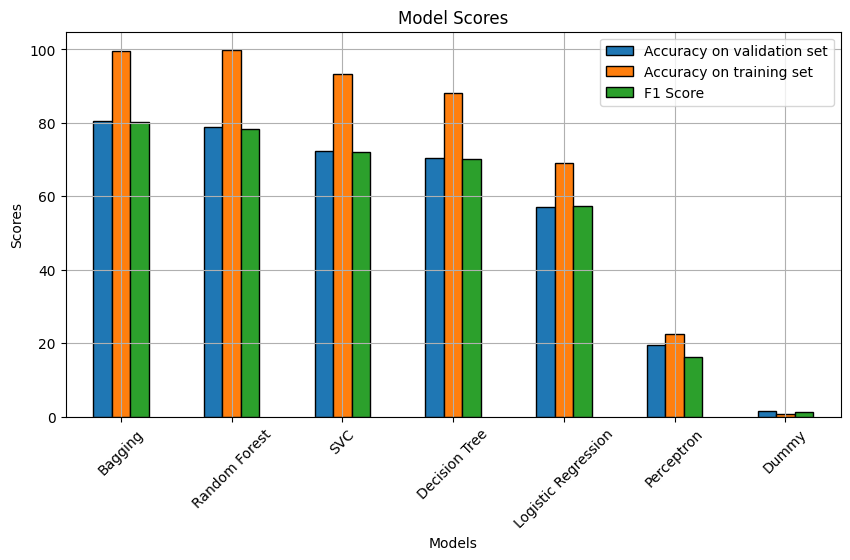

In [216]:
scores_df[["Accuracy on validation set", "Accuracy on training set", "F1 Score"]].plot(kind='bar', edgecolor='black', figsize=(10,5))

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Precision-Recall Curve
Per visualizzare i valori di precision e recall esiste un grafico creato appositamente chiamato "Precision-Recall Curve".

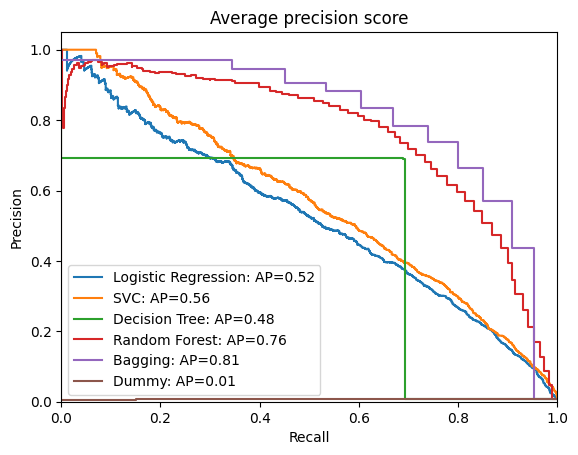

In [99]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Binarizza le etichette
y_bin = label_binarize(y_val, classes=np.unique(y_val))
n_classes = y_bin.shape[1]
plt.figure()

for model_name, model_info in models.items():
    if (model_name == "Perceptron"): # Perceptron non supporta predict_proba()
        continue
    
    # Addestra il modello e ottieni le probabilità delle previsioni
    model_info["Model"].fit(X_train, y_train)
    y_score = model_info["Model"].predict_proba(X_val)

    # Calcola la curva Precision-Recall per ogni classe
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])

    # Calcola la media delle curve Precision-Recall
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_bin.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_bin, y_score, average="micro")

    # Visualizza la curva Precision-Recall
    plt.step(recall['micro'], precision['micro'], where='post', label='{}: AP={:0.2f}'.format(model_name, average_precision["micro"]))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score')
plt.legend()
plt.show()

## Conclusioni

Riassumendo il lavoro svolto, abbiamo analizzato un dataset contenente un numero di birre e le caratteristiche ad esse associate.

Abbiamo affrontato l'analisi esplorativa dei dati, mostrando le informazioni e le statistiche principali del dataset utilizzando grafici e tabelle.

In seguito abbiamo preparato i dati per l'addestramento dei modelli di classificazione, creando le variabili target e features, suddividendo i dati in training set e validation set.

Poi abbiamo allenato diversi modelli di classificazione, tra cui Perceptron, Regressione Logistica, Support Vector Machine, Decision Tree, Random Forest e Bagging Classifier.

Infine, abbiamo valutato i modelli ottenuti e confrontato i risultati ottenuti, mostrando che il modello migliore per il nostro specifico caso d'uso è il Bagging Classifier con un'accuratezza del 80%.